# Setup

In [75]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
training = pd.read_csv('playground-series-s5e12/train.csv', index_col='id')
testing = pd.read_csv('playground-series-s5e12/test.csv', index_col='id')

training.head(5)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


# EDA

In [77]:
training.shape

(700000, 25)

In [78]:
print(training.isnull().sum())
print()
print(training.isna().sum())

age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
diagnosed_diabetes                    0


In [79]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total              

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000,700000,700000,700000,700000,700000,700000.000000,700000.000000,700000.000000,700000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,4,5,3,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,White,Highschool,Middle,Never,Employed,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,363237,386153,344145,290557,494448,516170,NaN,NaN,NaN,NaN
mean,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,...,NaN,NaN,NaN,NaN,NaN,NaN,0.149401,0.181990,0.030324,0.623296
std,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,...,NaN,NaN,NaN,NaN,NaN,NaN,0.356484,0.385837,0.171478,0.484560
min,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000


In [80]:
def get_vars(df, exclude_cols=None):
    """
    Identify variable types based on dtype + unique counts.

    Returns:
        {
            "numerical_vars": ...,
            "categorical_vars": ...,
            "continuous_vars": ...,
            "discrete_vars": ...,
            "binary_vars": ...,
            "true_numerical_vars": ...,
            "true_categorical_vars": ...,
            "all_vars": ...
        }
    """
    if exclude_cols is None:
        exclude_cols = []

    # --------------------
    # Base variable groups
    # --------------------
    numerical_vars = df.select_dtypes(include=["number"]).columns.tolist()
    categorical_vars = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Remove excluded columns from each list
    numerical_vars = [c for c in numerical_vars if c not in exclude_cols]
    categorical_vars = [c for c in categorical_vars if c not in exclude_cols]

    # --------------------
    # Continuous vs Discrete
    # --------------------
    continuous_vars = []
    discrete_vars = []

    n_rows = len(df)

    for col in numerical_vars:
        n_unique = df[col].nunique(dropna=True)

        if (n_unique <= 10) or (df[col].dtype.kind in "iu" and n_unique / n_rows < 0.01):
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    # --------------------
    # Binary detection (among discrete vars)
    # --------------------
    binary_vars = []
    nonbinary_discrete = discrete_vars.copy()

    for col in nonbinary_discrete.copy():
        unique_vals = df[col].dropna().unique()
        n_unique = len(unique_vals)

        if n_unique == 2:
            binary_vars.append(col)
            discrete_vars.remove(col)

    # --------------------
    # Final "true" groups
    # --------------------
    true_numerical_vars = continuous_vars + discrete_vars
    true_categorical_vars = categorical_vars + binary_vars
    all_vars = true_numerical_vars + true_categorical_vars

    # --------------------
    # Return everything
    # --------------------
    return {
        "numerical_vars": numerical_vars,
        "categorical_vars": categorical_vars,
        "continuous_vars": continuous_vars,
        "discrete_vars": discrete_vars,
        "binary_vars": binary_vars,
        "true_numerical_vars": true_numerical_vars,
        "true_categorical_vars": true_categorical_vars,
        "all_vars": all_vars
    }

vars_dict = get_vars(training, ["diagnosed_diabetes"])

print("Numerical:", vars_dict["numerical_vars"])
print("Categorical:", vars_dict["categorical_vars"])
print("Continuous:", vars_dict["continuous_vars"])
print("Discrete:", vars_dict["discrete_vars"])
print("Binary:", vars_dict["binary_vars"])
print("True numerical:", vars_dict["true_numerical_vars"])
print("True categorical:", vars_dict["true_categorical_vars"])
print("All vars:", vars_dict["all_vars"])

Numerical: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Categorical: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Continuous: ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio']
Discrete: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides']
Binary: ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
True numerical: ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_

## Outlier Checking

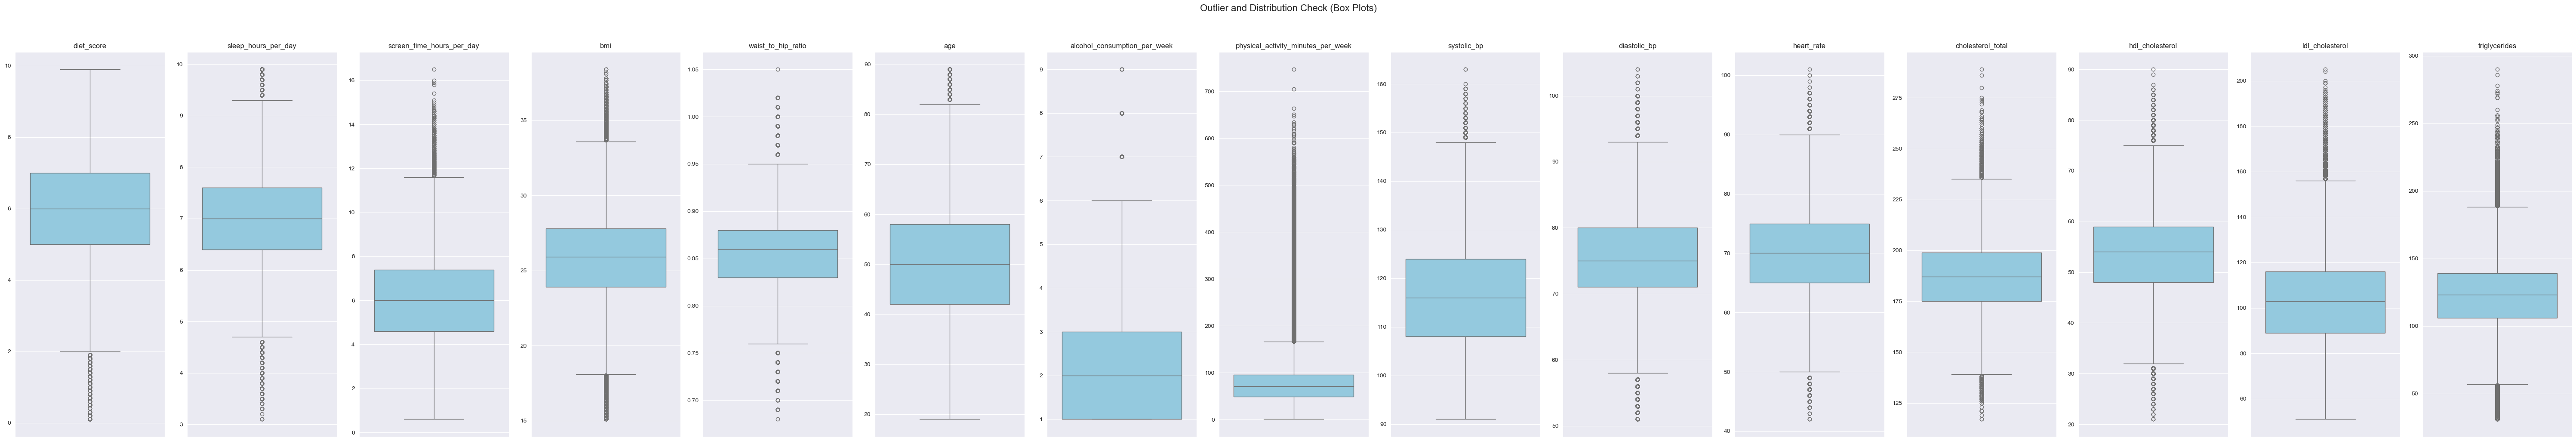

In [81]:
ncols = len(vars_dict["true_numerical_vars"])

fig, axes = plt.subplots(1, ncols, figsize=(4 * ncols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(vars_dict["true_numerical_vars"]):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [82]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[vars_dict["all_vars"]]
y = training["diagnosed_diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(490000, 24) (210000, 24)
diagnosed_diabetes
1.0    305131
0.0    184869
Name: count, dtype: int64


Training data is skewed. So I will use bootstrapping on my training data.

In [83]:
from sklearn.utils import resample

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.diagnosed_diabetes == 1]
minority = train_data[train_data.diagnosed_diabetes == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=SEED)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=SEED).reset_index(drop=True)

X_train = train_data_balanced.drop('diagnosed_diabetes', axis=1)
y_train = train_data_balanced['diagnosed_diabetes']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Balanced Train Counts:
diagnosed_diabetes
1.0    305131
0.0    305131
Name: count, dtype: int64


In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[vars_dict["true_numerical_vars"]])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[vars_dict["true_numerical_vars"]])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_test.index
)

In [85]:
X_train = pd.get_dummies(X_train[vars_dict["true_categorical_vars"]], drop_first=True)
X_test = pd.get_dummies(X_test[vars_dict["true_categorical_vars"]], drop_first=True)

X_train_encoded, X_test_encoded = X_train.align(
    X_test,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

X_train = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

print(f"Final Feature Shape Train: {X_train.shape}, Test: {X_test.shape}")

Encoded Shape Train: (610262, 21), Test: (210000, 21)
Final Feature Shape Train: (610262, 36), Test: (210000, 36)


In [86]:
X_train.head()

,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,systolic_bp,diastolic_bp,...,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,1.785588,0.552806,0.245210,-0.627645,0.317228,0.184502,-1.021358,-0.572585,1.823945,-1.374273,...,True,False,False,True,False,True,False,False,False,False
1,1.103056,1.108131,0.393594,0.001493,0.317228,0.270440,-1.021358,-0.967028,0.640708,-0.494817,...,False,False,False,True,False,True,False,False,False,False
2,0.693537,0.330676,-0.249406,0.980154,0.317228,-2.393653,-0.066504,0.047253,-1.179657,-1.960578,...,False,False,False,True,False,False,False,False,False,False
3,0.079259,-0.113584,1.283903,-0.208219,-0.472620,-0.331129,-0.066504,0.141168,-2.089840,0.238064,...,False,False,False,True,False,False,True,False,False,False
4,-0.057248,-0.779973,-0.101021,-0.452884,1.370358,-1.104576,-1.021358,-0.666500,-0.451511,-1.960578,...,False,False,True,False,False,False,True,False,False,False


# Evaluation Function

In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        # because the test is not balanced, I will only graph some of the PR curve to make it more readable
        axes[1].set_ylim([0.5, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

# Logistic Regression Model

--- Logistic Regression ---
Train Accuracy: 0.6378 | Train AUC: 0.6961
Test  Accuracy: 0.6285 | Test  AUC: 0.6953
✅ Model seems balanced
------------------------------


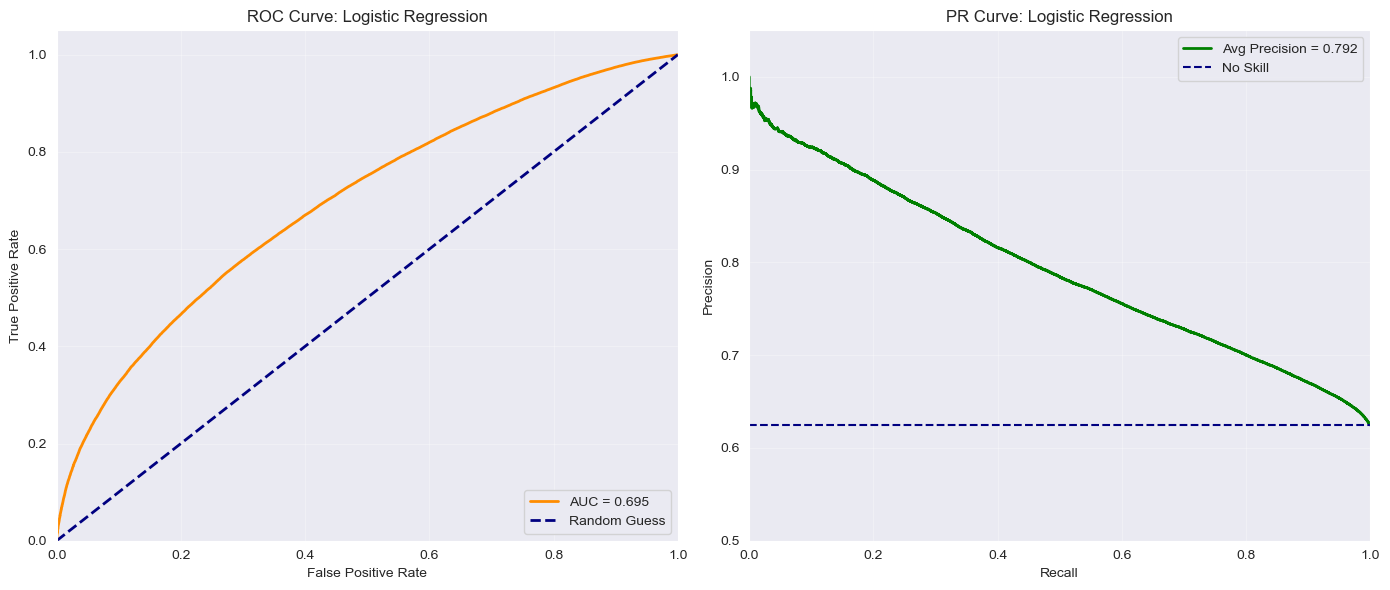

In [88]:
from sklearn.linear_model import LogisticRegression

results = []

lr = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr, X_train, y_train, X_test, y_test, "Logistic Regression", True)
)

# Gradient Boosting Classifier Model


Starting Fitting for Best Gradient Boosting...
--- Gradient Boosting (Tuned) ---
Train Accuracy: 0.6606 | Train AUC: 0.7243
Test  Accuracy: 0.6422 | Test  AUC: 0.7122
✅ Model seems balanced
------------------------------


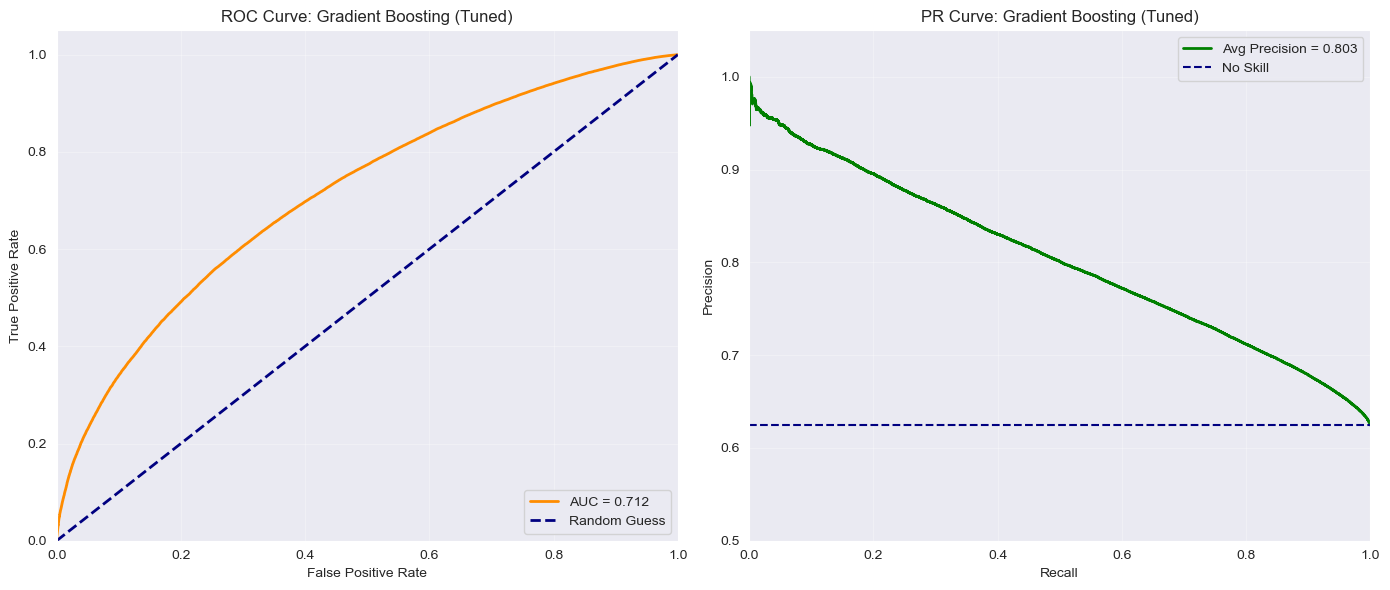

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

best_params = {
    'learning_rate': np.float64(0.0483437145318464),
    'max_depth': 7,
    'n_estimators': 70
}

tuned_gb = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Gradient Boosting...")
tuned_gb.fit(X_train, y_train)

results.append(
    evaluate_and_graph(tuned_gb, X_train, y_train, X_test, y_test, "Gradient Boosting (Tuned)", True)
)

# Other Gradient Boosting Libraries

--- XGBoost ---
Train Accuracy: 0.6597 | Train AUC: 0.7228
Test  Accuracy: 0.6416 | Test  AUC: 0.7118
✅ Model seems balanced
------------------------------


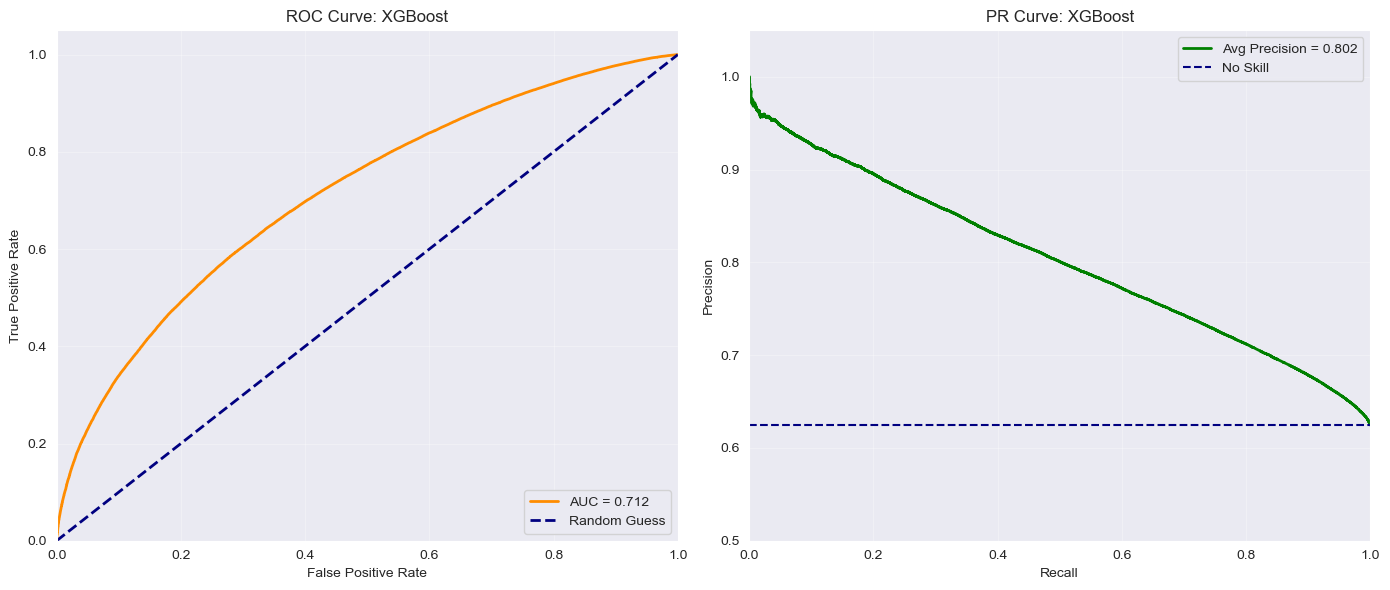

In [90]:
from xgboost import XGBClassifier

xgb_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "max_depth": int(best_params["max_depth"]),
    "n_estimators": int(best_params["n_estimators"]),
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "reg_lambda": 1.0,
    "random_state": SEED,
    "eval_metric": "logloss",
    "tree_method": "hist",
}

xgb = XGBClassifier(**xgb_params)

results.append(
    evaluate_and_graph(xgb, X_train, y_train, X_test, y_test, "XGBoost", True)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Train Accuracy: 0.6574 | Train AUC: 0.7195
Test  Accuracy: 0.6417 | Test  AUC: 0.7121
✅ Model seems balanced
------------------------------


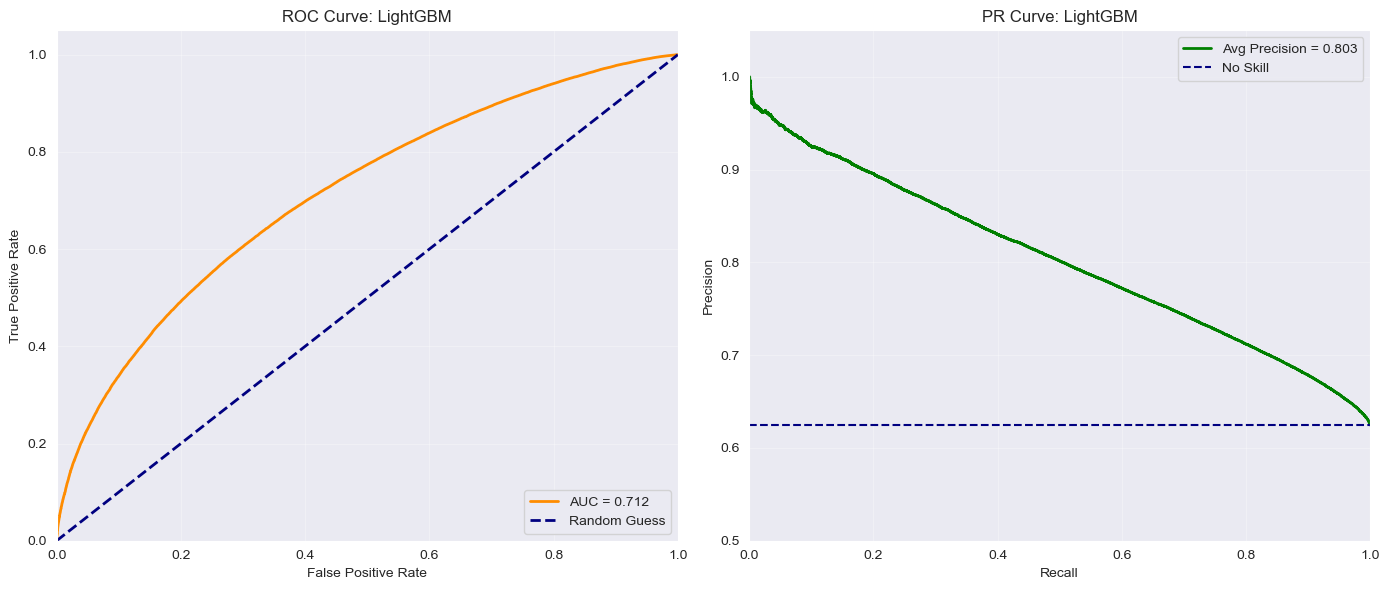

In [91]:
from lightgbm import LGBMClassifier

lgbm_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "max_depth": int(best_params["max_depth"]),
    "n_estimators": int(best_params["n_estimators"]),
    "num_leaves": 63,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "random_state": SEED,
}

lgbm = LGBMClassifier(**lgbm_params)

results.append(
    evaluate_and_graph(lgbm, X_train, y_train, X_test, y_test, "LightGBM", True)
)

--- CatBoost ---
Train Accuracy: 0.6462 | Train AUC: 0.7059
Test  Accuracy: 0.6336 | Test  AUC: 0.7038
✅ Model seems balanced
------------------------------


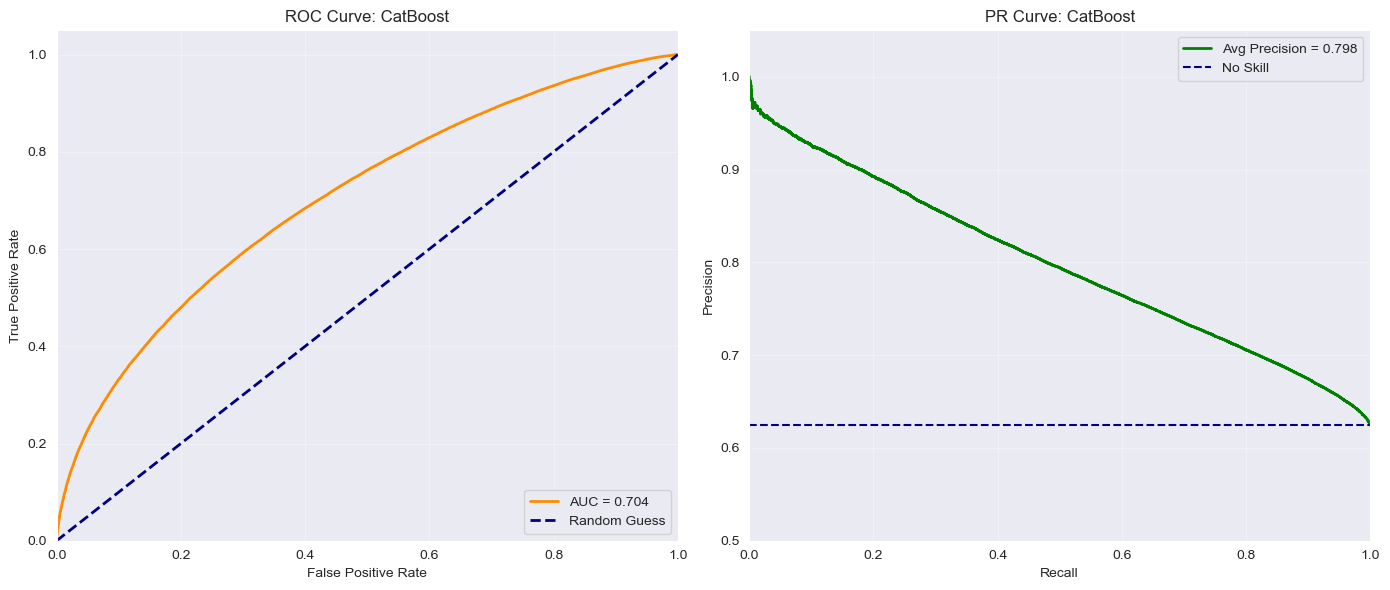

In [92]:
from catboost import CatBoostClassifier

cat_params = {
    "learning_rate": float(best_params["learning_rate"]),
    "depth": int(best_params["max_depth"]),
    "iterations": int(best_params["n_estimators"]),
    "loss_function": "Logloss",
    "random_seed": SEED,
    "verbose": False,
}

cat = CatBoostClassifier(**cat_params)

results.append(
    evaluate_and_graph(cat, X_train, y_train, X_test, y_test, "CatBoost", True)
)

# Ensemble Stacking

In [94]:
from sklearn.ensemble import StackingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin, clone

weights = {
    "gb_tuned": 2.0,
    "lgbm": 2.0,
    "xgb": 2.0,
    "cat": 1.0,
    "lr": 1.0
}

estimators = [
    ("gb_tuned", tuned_gb),
    ("lgbm", lgbm),
    ("xgb", xgb),
    ("cat", cat),
    ("lr", lr),
]

class WeightedStackingClassifier(BaseEstimator, ClassifierMixin):
    """
    Wrap sklearn StackingClassifier, then scale the meta-features (base model outputs)
    by user-provided weights before passing them to the final estimator.
    """
    def __init__(self, estimators, final_estimator, weights, cv=5, n_jobs=-1, passthrough=False):
        self.estimators = estimators
        self.final_estimator = final_estimator
        self.weights = weights
        self.cv = cv
        self.n_jobs = n_jobs
        self.passthrough = passthrough

    def fit(self, X, y):
        self._stack = StackingClassifier(
            estimators=self.estimators,
            final_estimator=clone(self.final_estimator),
            stack_method="predict_proba",
            passthrough=self.passthrough,
            cv=self.cv,
            n_jobs=self.n_jobs
        )

        self._stack.fit(X, y)

        # Keep classes_ for your evaluate_and_graph compatibility
        self.classes_ = getattr(self._stack, "classes_", np.unique(y))

        # Cache estimator names in the exact order used by stacking
        self._names = [name for name, _ in self.estimators]

        return self

    def _weighted_meta_features(self, X):
        """
        Get base model predicted probs for class 1 from each estimator,
        stack into shape (n_samples, n_models), apply weights per column.
        """
        meta = []
        for name, est in zip(self._names, self._stack.estimators_):
            proba = est.predict_proba(X)

            # binary case: class-1 column is index where class==1
            # safest: find index of class 1
            classes = getattr(est, "classes_", None)
            if classes is None:
                pos_idx = 1
            else:
                pos_idx = list(classes).index(1) if 1 in list(classes) else 1

            p1 = proba[:, pos_idx]
            meta.append(p1)

        meta = np.column_stack(meta)

        # Apply weights
        w = np.array([float(self.weights.get(n, 1.0)) for n in self._names], dtype=float)
        meta = meta * w

        return meta

    def predict_proba(self, X):
        # If passthrough=True, meta model expects [weighted_meta | original X]
        meta = self._weighted_meta_features(X)

        if self.passthrough:
            # concatenate original features
            X_arr = X.to_numpy() if hasattr(X, "to_numpy") else np.asarray(X)
            meta = np.hstack([meta, X_arr])

        final = self._stack.final_estimator_

        return final.predict_proba(meta)

    def predict(self, X):
        proba = self.predict_proba(X)
        # choose class with max probability
        return self.classes_[np.argmax(proba, axis=1)]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 305131, number of negative: 305131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 610262, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244105, number of negative: 244105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of 

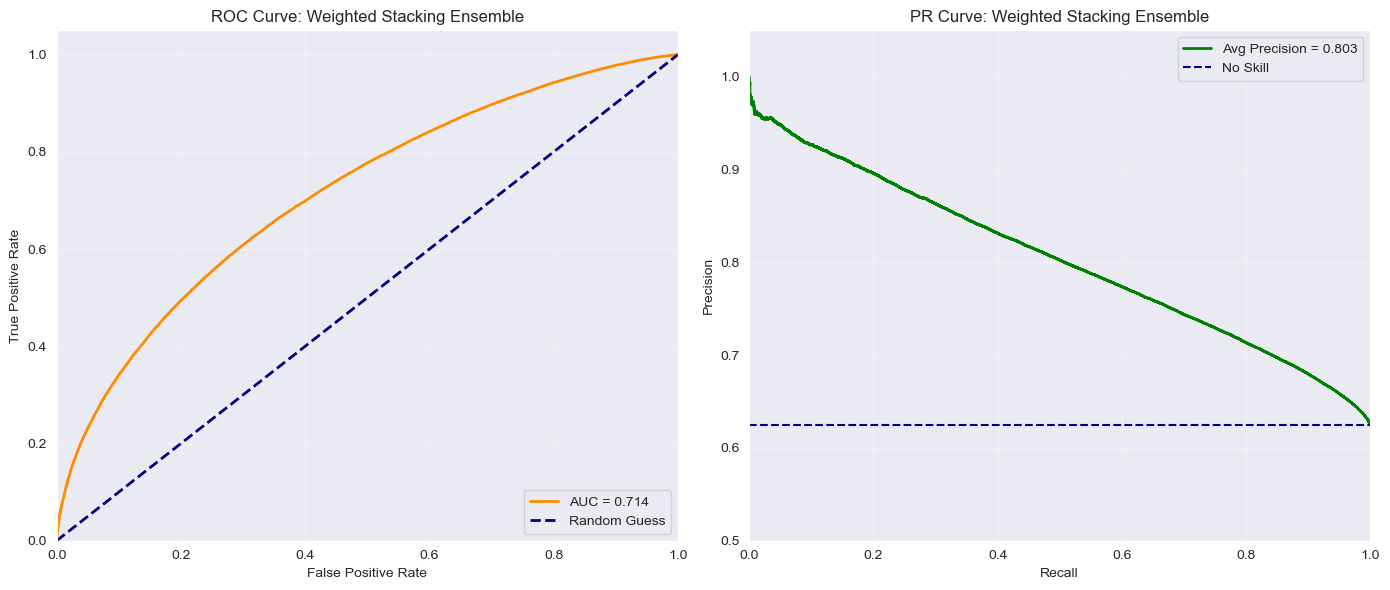

In [95]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

stack_weighted = WeightedStackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=3000),
    weights=weights,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

results.append(
    evaluate_and_graph(stack_weighted, X_train, y_train, X_test, y_test, "Weighted Stacking Ensemble", True)
)

# Results

In [98]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 6
Valid Models: 6
Disqualified Models: 0

✅ No models were disqualified for overfitting.
Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
1,Gradient Boosting (Tuned),0.642224,0.712208,0.802657,0.66059,0.724286,0.012077,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Weighted Stacking Ensemble,0.625205,0.713872,0.803311,0.501075,0.728868,0.014995,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Weighted Stacking Ensemble,0.625205,0.713872,0.803311,0.501075,0.728868,0.014995,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
5,Weighted Stacking Ensemble,0.625205,0.713872,0.803311,0.014995
1,Gradient Boosting (Tuned),0.642224,0.712208,0.802657,0.012077
3,LightGBM,0.641700,0.712076,0.802616,0.007449
2,XGBoost,0.641624,0.711794,0.802234,0.011036
4,CatBoost,0.633586,0.703829,0.797641,0.002022
0,Logistic Regression,0.628548,0.695317,0.791999,0.000744



🏆 Best model: Weighted Stacking Ensemble


# Submission for Kaggle

Manual Process, must use results to correctly call the best model

In [96]:
testing_scaled_num = scaler.transform(testing[vars_dict["true_numerical_vars"]])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=testing.index
)

testing_dummies = pd.get_dummies(testing[vars_dict["true_categorical_vars"]], drop_first=True)

_, testing_encoded_aligned = X_train_encoded.align(
    testing_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {testing_scaled_df.shape}")
print(f"Testing shape:  {testing_final.shape}")

Training shape: (300000, 15)
Testing shape:  (300000, 36)


In [99]:
predictions = stack_weighted.predict_proba(testing_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'diagnosed_diabetes': predictions
})

submission.to_csv('stacked_ensemble_gradient_boosting.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


,id,diagnosed_diabetes
0,700000,0.987275
1,700001,0.998030
2,700002,0.999738
3,700003,0.982213
4,700004,0.999993
